# MatPlotLib tutorial guide

## MatPlotLib Context
MatPlotLib is organized in a hierarchy, with the master being the **state-machine environment**.  
At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current figure.


**First level - "object-oriented interface"**
At this level, the user uses pyplot to create figures, and through those figures, one or more axes can be created. These **axes objects** are then used for most plotting actions

#### Figure:
The whole figure.  The figure keeps track of the child **axes** and the **canvas**. 
#### Axes: "the plot"
The axes contains two (or three in the case of 3d models) **Axis objects**, which take care of data limits. 
Each axis has **a title**, **x-label**, and **y-label**.
#### Axis: Number-line-like objects
The location of ticks set by **locator**
Tick label strings are formatted by a **formater**
#### Artist: Everything you see on the figure
(figure, axes, and axis object)
All artists are drawn on the **canvas**
Most artists are tied to an **Axes**

<Figure size 432x288 with 0 Axes>

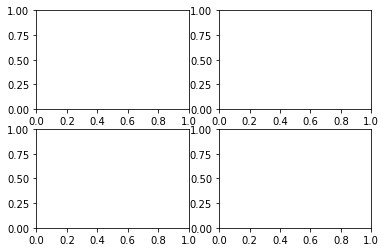

In [26]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure() # an empty figure with no axes
fig.suptitle('No axes on this figure') # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes

### to convert a pandas.DataFrame

In [27]:
a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asndarray = a.values

NameError: name 'pandas' is not defined

### to convert a np.matrix

In [28]:
b = np.matrix([[1,2,],[3,4]])
b_asarray = np.asarray(b)

### Matplotlib, pyplot, and pylab: how are they related?

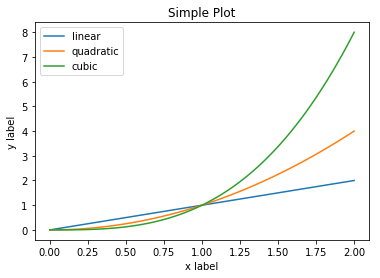

In [29]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

### Coding Styles
For pyplot style, the imports at the top of your scripts will typically be:

In [30]:
import matplotlib.pyplot as plt
import numpy as np

Then one calls, for example, np.arrage, np.zeros, np.pi, plt,figure, plt.plot, plt.show, etc. use the pyplot interface for creating figures, and then use the object methods for the rest:

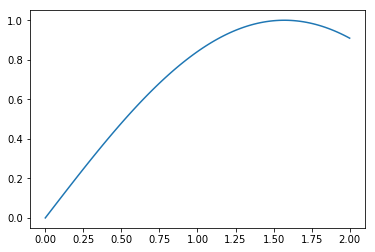

In [31]:
import matplotlib.pyplot as plt
import numpy as np

#x = np.arrange(0, 10, 0.2) #np.arrange not working??
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

### Specialized functions:
Oftentimes, one can find themselves making the same plots over and over again, but with different data sets, which elads to needing to write **specialized functions** to do the plotting.  The reccomended function signature looks like:

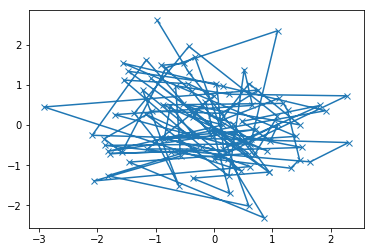

In [32]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

In the case of 2 sub-plots:

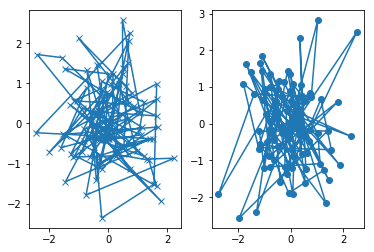

In [33]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

### Backends: 
#### What is a backend?
Matplotlib is used in a variety of different environments, (python shell, jupter notebooks, wxpython or pygtk, etc) so the purpose of the backend environment is to be able to do the behind-the-scences of making the figure for the **specific interface** that you are using matplotlib for.  
The **frontend** refers to the user facing code.

There are four ways to configure your backend.  If they conflict each other, the program will override the changes.

**1.** The backend parameter in your *matplotlibrc* file

In [34]:
backend : WXAgg # use wxpython with antigrain (agg) rendering

NameError: name 'WXAgg' is not defined

**2.** Setting the *MPLBACKEND* environment variable, either for your current shell or for a single script.  On Unix:

In [35]:
> export MPLBACKEND=module://my_backend
> python simple_plot.py

> MPLBACKEND="module://my_backend" python simple_plot.py

SyntaxError: invalid syntax (<ipython-input-35-eeab2b0d8233>, line 1)

**3.** If your script depends on a specific backend you can sue the *use()* function:

In [36]:
import matplotlib
matplotlib.use('PS') # generate postscript output by default

You should avoid explicitly calling *use()* unless absolutely necessary. This is because using *use()* will require changes in your code if users later want to change the backend.

### Interactive and non-interactive examples

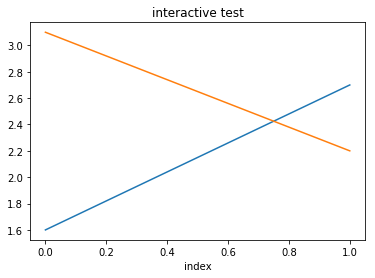

In [40]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot([1.6, 2.7])
plt.title("interactive test")
plt.xlabel("index")
ax = plt.gca()
ax.plot([3.1, 2.2])
plt.draw()

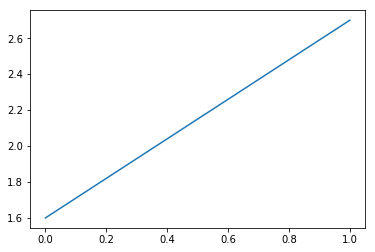

In [41]:
import matplotlib.pyplot as plt
plt.ioff()
plt.plot([1.6, 2.7])
plt.show()

/Users/masond/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


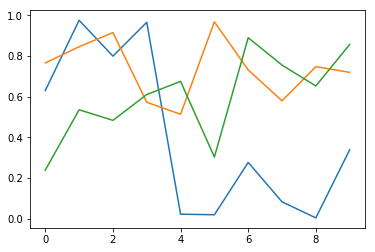

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

### Summary
In interactive mode, pyplot functions automatically draw to the screen.  To refresh the plot, call *draw()* in your script.
Use non-interactive move in scripts in which you want to generate one or more figures and display them before ending or generating new figures.  use *show()* to display figures and to block execution until you have maually destroyed them.

### Performance:
If you want to increase performance, you can use line segment simplification, this script will first display without any simplification, and then display the same data with simplification.

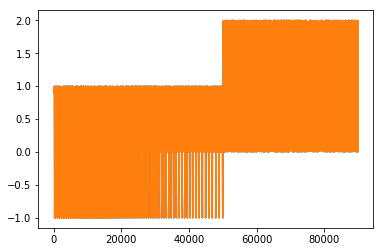

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(10000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

### Marker Simplification:
Can use the following command to manually set the marker settings

ValueError: x and y must have same first dimension, but have shapes (100,) and (90000,)

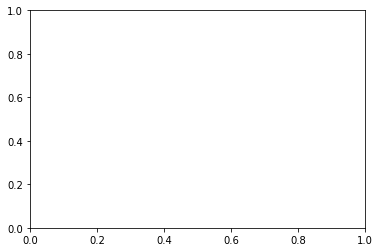

In [47]:
plt.plot(x, y, markevery=10)

The following script will first display the data without any chunk size restriction, and then display the same data with a chunk size of 10,000. The difference can best be seen when the figures are large.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()

**The following code can be used to optomize the legends in a script**

In [ ]:
import matplotlib.style as mplstyle
mplstyle.use('fast')
# Make sure to include this last so it does not 
# overwrite other style settings
mplstyle.use(['dark_background', 'ggplot', 'fast'])